In [1]:
import uproot
import pandas
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})

In [2]:
root_file = '/eos/user/t/tsculac/BigStuff/LegacyProduction_1/MuonWPOptimization/ZZTo4l/ZZ4lAnalysis.root'

tree = uproot.open(root_file)["ZZTree/candTree"]

In [3]:
df = tree.pandas.df(entrystop=None, flatten=False)

In [4]:
hCounters = uproot.open(root_file)["ZZTree/Counters"]

gen_sum_weights = hCounters[40]

In [5]:
df = df.query('ZZsel >= 90')

num_of_leptons = df['LepEta'].apply(lambda x: len(x))
df['num_of_leptons'] = num_of_leptons

df = df.query('num_of_leptons == 4')
df = df.query('ZZMass >= 118 and ZZMass <= 130')

## 4mu only

In [6]:
df = df.query('Z1Flav == -169 and Z2Flav == -169')

isBDT_75_95 = []
isBDT_80_96 = []
isBDT_85_97 = []
isBDT_90_98 = []
isBDT_95_99 = []


for i in df.index:
    temp_75_95 = (np.select(condlist=[df['LepPt'][i] <= 10, df['LepPt'][i] > 10],
                            choicelist=[df['LepBDT'][i] > 2.069, df['LepBDT'][i] > 1.406]))
    isBDT_75_95_temp = temp_75_95.all()
    isBDT_75_95.append(isBDT_75_95_temp)
    
    
    temp_80_96 = (np.select(condlist=[df['LepPt'][i] <= 10, df['LepPt'][i] > 10],
                            choicelist=[df['LepBDT'][i] > 1.768, df['LepBDT'][i] > 1.031]))
    isBDT_80_96_temp = temp_80_96.all()
    isBDT_80_96.append(isBDT_80_96_temp)
    
    
    temp_85_97 = (np.select(condlist=[df['LepPt'][i] <= 10, df['LepPt'][i] > 10],
                            choicelist=[df['LepBDT'][i] > 1.395, df['LepBDT'][i] > 0.535]))
    isBDT_85_97_temp = temp_85_97.all()
    isBDT_85_97.append(isBDT_85_97_temp)
    
    
    temp_90_98 = (np.select(condlist=[df['LepPt'][i] <= 10, df['LepPt'][i] > 10],
                            choicelist=[df['LepBDT'][i] > 0.885, df['LepBDT'][i] > -0.194]))
    isBDT_90_98_temp = temp_90_98.all()
    isBDT_90_98.append(isBDT_90_98_temp)
    
    
    temp_95_99 = (np.select(condlist=[df['LepPt'][i] <= 10, df['LepPt'][i] > 10],
                            choicelist=[df['LepBDT'][i] > -0.033, df['LepBDT'][i] > -1.459]))
    isBDT_95_99_temp = temp_95_99.all()
    isBDT_95_99.append(isBDT_95_99_temp)
    

df['isBDT_75_95'] = isBDT_75_95
df['isBDT_80_96'] = isBDT_80_96
df['isBDT_85_97'] = isBDT_85_97
df['isBDT_90_98'] = isBDT_90_98
df['isBDT_95_99'] = isBDT_95_99

df_75_95 = df.query('isBDT_75_95 == True')
df_80_96 = df.query('isBDT_80_96 == True')
df_85_97 = df.query('isBDT_85_97 == True')
df_90_98 = df.query('isBDT_90_98 == True')
df_95_99 = df.query('isBDT_95_99 == True')

In [7]:
k_factor = df['KFactor_EW_qqZZ']*df['KFactor_QCD_qqZZ_M']
event_weight = (35.9*1000*df['xsec']*k_factor*df['overallEventWeight'])/gen_sum_weights

k_factor = df_75_95['KFactor_EW_qqZZ']*df_75_95['KFactor_QCD_qqZZ_M']
event_weight_75_95 = (35.9*1000*df_75_95['xsec']*k_factor*df_75_95['overallEventWeight'])/gen_sum_weights

k_factor = df_80_96['KFactor_EW_qqZZ']*df_80_96['KFactor_QCD_qqZZ_M']
event_weight_80_96 = (35.9*1000*df_80_96['xsec']*k_factor*df_80_96['overallEventWeight'])/gen_sum_weights

k_factor = df_85_97['KFactor_EW_qqZZ']*df_85_97['KFactor_QCD_qqZZ_M']
event_weight_85_97 = (35.9*1000*df_85_97['xsec']*k_factor*df_85_97['overallEventWeight'])/gen_sum_weights

k_factor = df_90_98['KFactor_EW_qqZZ']*df_90_98['KFactor_QCD_qqZZ_M']
event_weight_90_98 = (35.9*1000*df_90_98['xsec']*k_factor*df_90_98['overallEventWeight'])/gen_sum_weights

k_factor = df_95_99['KFactor_EW_qqZZ']*df_95_99['KFactor_QCD_qqZZ_M']
event_weight_95_99 = (35.9*1000*df_95_99['xsec']*k_factor*df_95_99['overallEventWeight'])/gen_sum_weights

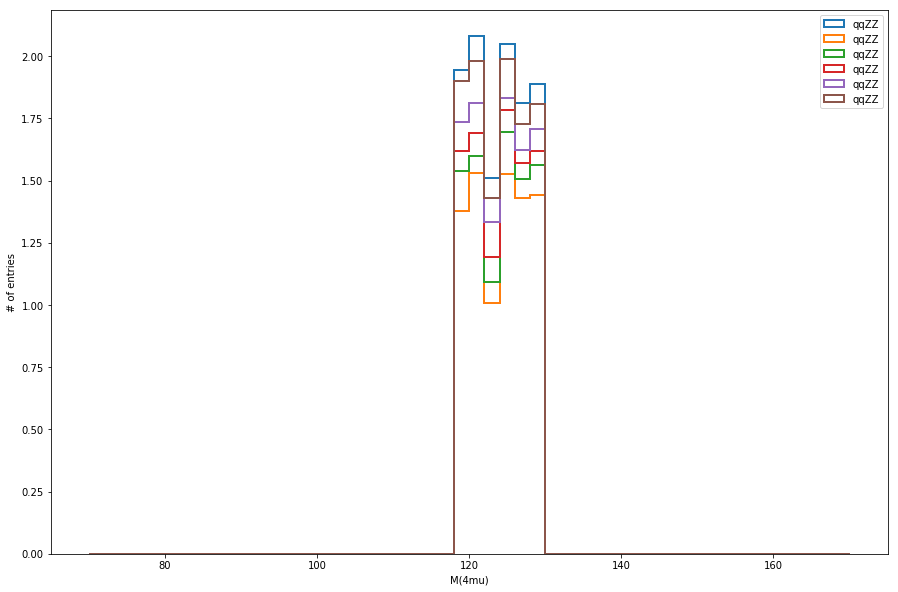

In [8]:
plt.figure(figsize = (15,10))
# plt.yscale('log')
values, bins, _       = plt.hist(df['ZZMass'], bins=50, histtype='step', linewidth=2, weights=event_weight, range=[70,170], label='qqZZ')
values_75_95, bins, _ = plt.hist(df_75_95['ZZMass'], bins=50, histtype='step', linewidth=2, weights=event_weight_75_95, range=[70,170], label='qqZZ')
values_80_96, bins, _ = plt.hist(df_80_96['ZZMass'], bins=50, histtype='step', linewidth=2, weights=event_weight_80_96, range=[70,170], label='qqZZ')
values_85_97, bins, _ = plt.hist(df_85_97['ZZMass'], bins=50, histtype='step', linewidth=2, weights=event_weight_85_97, range=[70,170], label='qqZZ')
values_90_98, bins, _ = plt.hist(df_90_98['ZZMass'], bins=50, histtype='step', linewidth=2, weights=event_weight_90_98, range=[70,170], label='qqZZ')
values_95_99, bins, _ = plt.hist(df_95_99['ZZMass'], bins=50, histtype='step', linewidth=2, weights=event_weight_95_99, range=[70,170], label='qqZZ')

plt.title('')
plt.ylabel('# of entries')
plt.xlabel('M(4mu)')
plt.legend()
# values

In [9]:
yield_99_99 = sum(values)
print yield_99_99

yield_75_95 = sum(values_75_95)
print yield_75_95

yield_80_96 = sum(values_80_96)
print yield_80_96

yield_85_97 = sum(values_85_97)
print yield_85_97

yield_90_98 = sum(values_90_98)
print yield_90_98

yield_95_99 = sum(values_95_99)
print yield_95_99

11.286847114562988
8.319790720939636
8.995099902153015
9.47780692577362
10.049499034881592
10.837172746658325
